In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score,train_test_split
import sklearn.metrics as skm

In [136]:
%matplotlib inline

In [21]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


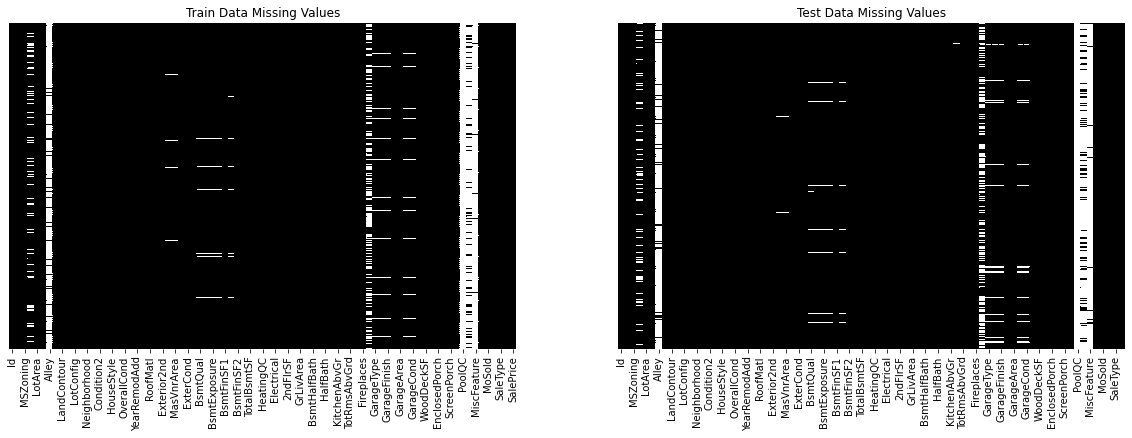

In [22]:
#  Detecting missing data

fig, ax = plt.subplots(ncols=2, figsize=(20,6))
fig1=sns.heatmap(train.isna(),
            yticklabels=False,
            cbar=False,
            cmap='gray',
            ax=ax[0])
sns.heatmap(test.isna(),
            yticklabels=False,
            cbar=False,
            cmap='gray',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [5]:
drop_columns= ["Id"]
total_columns=[]
for col in train:
    total_columns.append(col)
    mean = train[col].isnull().mean() and train[col].isna().mean()
    #print(('A coluna {} tem a media de {} dados faltantes').format(col,round(mean,3)))
    if round(mean,3) > 0.4:
        drop_columns.append(col)

In [6]:
train.drop(drop_columns, inplace=True, axis=1)
test.drop(drop_columns, inplace=True, axis=1)

In [7]:
object_columns=[]
for col in zip(train,train.dtypes):
    obj_col= col[1]
    is_na = train[col[0]].isna().sum() > 0
    if ((obj_col == object) and (is_na == True)):
        object_columns.append(col[0])

In [8]:
final_train = train.drop(object_columns, axis=1)
final_test = test.drop(object_columns, axis=1)

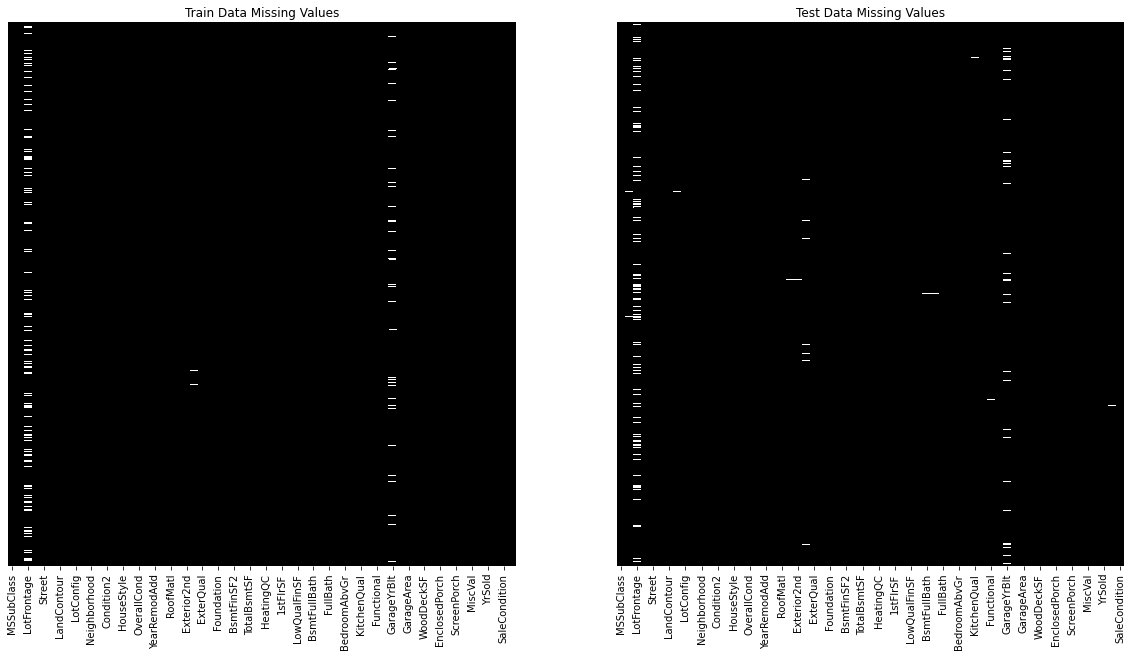

In [9]:
#   Missing Data after drop columns

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
fig1=sns.heatmap(final_train.isna(),
            yticklabels=False,
            cbar=False,
            cmap='gray',
            ax=ax[0])
sns.heatmap(final_test.isna(),
            yticklabels=False,
            cbar=False,
            cmap='gray',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [10]:
def fillna_with_mean(df):
    for col in zip(df,df.dtypes):
        types= col[1]
        if (df[col[0]].isna().sum() > 0 and types != object):
            mean_value=df[col[0]].mean()
            df[col[0]]=df[col[0]].fillna(mean_value)
            
def fillna_with_mode(df):
    for col in zip(df,df.dtypes):
        types= col[1]
        if (df[col[0]].isna().sum() > 0 and types == object):
            mode=df[col[0]].mode()[0]
            df[col[0]]=df[col[0]].fillna(mode)

In [11]:
fillna_with_mean(final_train)
fillna_with_mean(final_test)
fillna_with_mode(final_train)
fillna_with_mode(final_test)

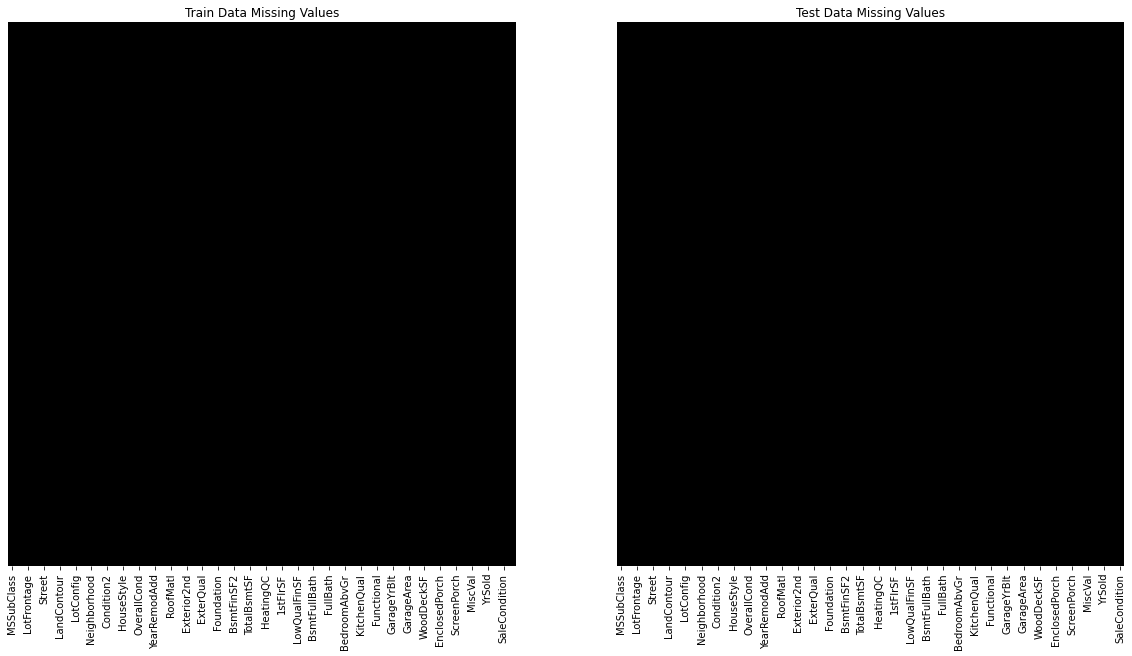

In [12]:
# Fill all Missing Data with mean for non object data type and mode for object data type

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
fig1=sns.heatmap(final_train.isna(),
            yticklabels=False,
            cbar=False,
            cmap='gray',
            ax=ax[0])
sns.heatmap(final_test.isna(),
            yticklabels=False,
            cbar=False,
            cmap='gray',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [61]:
X = pd.DataFrame(final_train.iloc[:,:-1])
y = pd.DataFrame(final_train.iloc[:,-1])

In [62]:
enc = OneHotEncoder()
X_enc = enc.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=42)

In [80]:
test = enc.transform(final_test)

ValueError: Found unknown categories [150] in column 0 during transform

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
DTR1 = DecisionTreeRegressor(max_depth=100)
DTR2 = DecisionTreeRegressor(max_depth=5)

In [131]:
DTR1.fit(X_train, np.ravel(y_train))

DecisionTreeRegressor(max_depth=100)

In [132]:
y_1 = DTR1.predict(X_test)

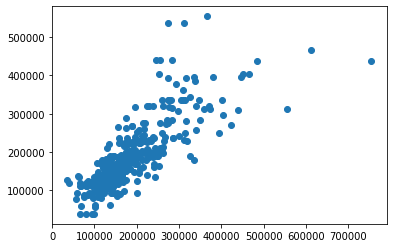

In [133]:
plt.scatter(y_test, y_1)

In [141]:
skm.mean_absolute_error(y_test, y_1)

33448.963470319635

# ___

In [102]:
from sklearn import svm

In [142]:
clf = svm.SVR()

In [143]:
clf.fit(X_train, np.ravel(y_train))

SVR()

In [144]:
y_svm = clf.predict(X_test)

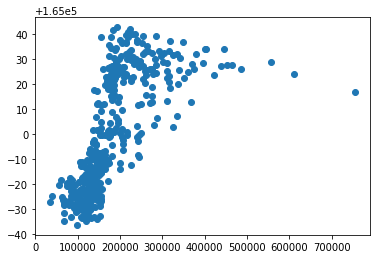

In [145]:
plt.scatter(y_test, y_svm)

In [146]:
skm.mean_absolute_error(y_test, y_svm)

57028.32096053558

# Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
LR = LogisticRegression(random_state=42)

In [149]:
LR.fit(X_train, np.ravel(y_train))

/home/vinicius/.local/share/virtualenvs/House_Prices_Advanced_Regression_Technique-gBvnqxBm/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [151]:
y_LR=LR.predict(X_test)

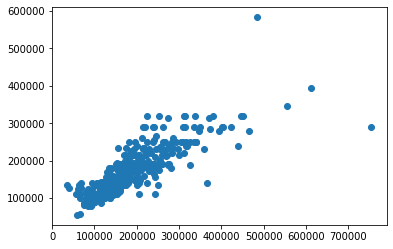

In [152]:
plt.scatter(y_test, y_LR)

In [154]:
skm.mean_absolute_error(y_test, y_LR)

29879.26484018265